In [1]:
import pandas as pd

BATCH_SIZE = 16
IMG_SIZE = 224
SEED = 42
input_path = "dataset/ChestXray NIH"

df = (pd.read_csv(f'{input_path}/preprocessed_data.csv')
      [["Unnamed: 0", "No Finding", "Atelectasis", "Cardiomegaly", "Effusion", "Infiltration", "Mass", "Nodule", "Pneumonia", "Pneumothorax", "Consolidation", "Edema", "Emphysema", "Fibrosis", "Pleural_Thickening", "Hernia"]])
df.columns = ["Image_Path", "No Finding", "Atelectasis", "Cardiomegaly", "Effusion", "Infiltration", "Mass", "Nodule", "Pneumonia", "Pneumothorax", "Consolidation", "Edema", "Emphysema", "Fibrosis", "Pleural_Thickening", "Hernia"]
df.iloc[:, 1:] = df.iloc[:, 1:].astype(int)
display(df.head())

,Image_Path,No Finding,Atelectasis,Cardiomegaly,Effusion,Infiltration,Mass,Nodule,Pneumonia,Pneumothorax,Consolidation,Edema,Emphysema,Fibrosis,Pleural_Thickening,Hernia
0,dataset/ChestXray NIH/images_001/images/000000...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,dataset/ChestXray NIH/images_001/images/000000...,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,dataset/ChestXray NIH/images_001/images/000000...,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
3,dataset/ChestXray NIH/images_001/images/000000...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,dataset/ChestXray NIH/images_001/images/000000...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [2]:
len(df)

112120

In [3]:
import numpy as np

df_co_occurrence = df.drop(columns=["Image_Path"]).T.dot(df.drop(columns=["Image_Path"]))
df_co_occurrence

,No Finding,Atelectasis,Cardiomegaly,Effusion,Infiltration,Mass,Nodule,Pneumonia,Pneumothorax,Consolidation,Edema,Emphysema,Fibrosis,Pleural_Thickening,Hernia
No Finding,60361,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Atelectasis,0,11559,370,3275,3264,739,590,262,774,1223,221,424,220,496,40
Cardiomegaly,0,370,2776,1063,587,102,108,41,49,169,127,44,52,111,7
Effusion,0,3275,1063,13317,4000,1254,912,269,996,1287,593,359,188,849,21
Infiltration,0,3264,587,4000,19894,1159,1546,605,946,1221,981,449,345,750,33
Mass,0,739,102,1254,1159,5782,906,71,431,610,129,215,117,452,25
Nodule,0,590,108,912,1546,906,6331,70,341,428,131,115,166,411,10
Pneumonia,0,262,41,269,605,71,70,1431,41,123,340,23,11,48,3
Pneumothorax,0,774,49,996,946,431,341,41,5302,223,33,747,80,289,9
Consolidation,0,1223,169,1287,1221,610,428,123,223,4667,162,103,79,251,4


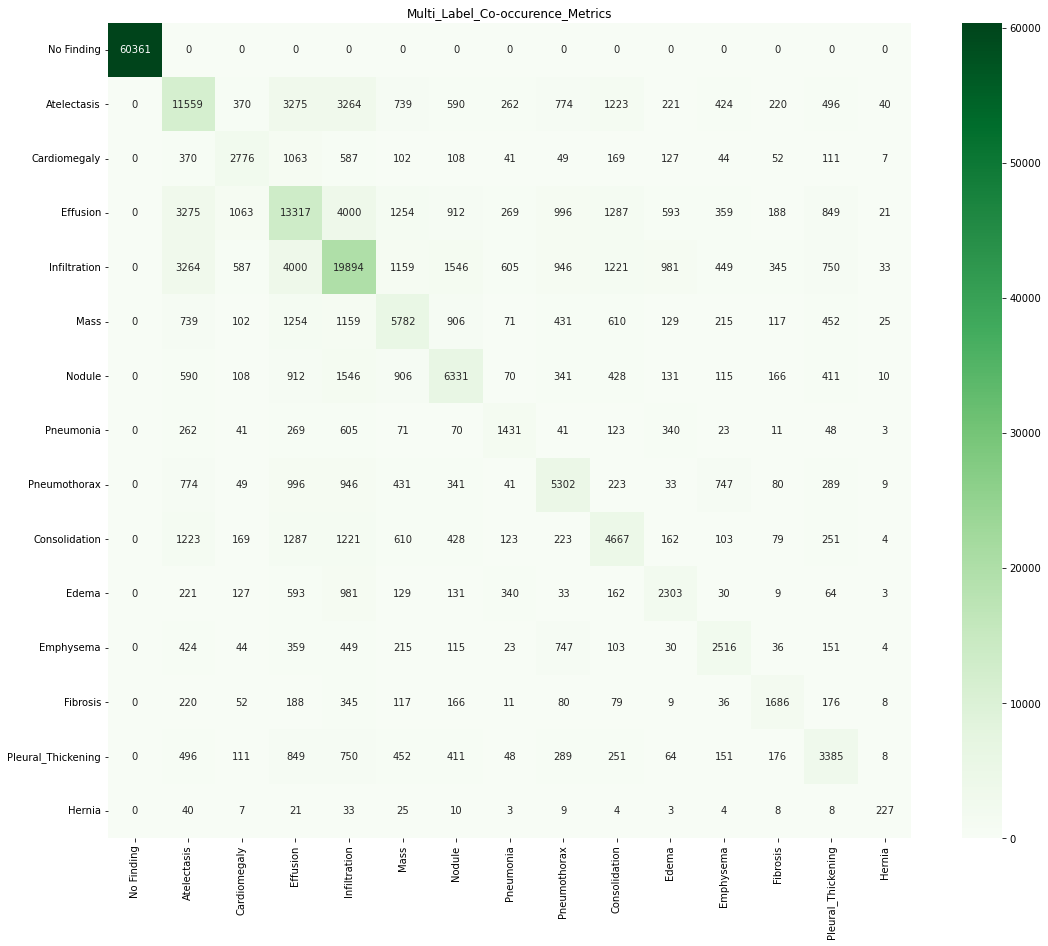

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 15))
confusion_metrics_plot =  sns.heatmap(df_co_occurrence,
            cmap="Greens",
            annot=True,
            label=True,
            fmt="d")
fig = confusion_metrics_plot.get_figure()
fig.savefig("Multi_Label_Co-occurence_Metrics.png") 
plt.title("Multi_Label_Co-occurence_Metrics")
plt.show();

In [5]:
# Make to percentage
diagonal = np.diagonal(df_co_occurrence)
with np.errstate(divide='ignore', invalid='ignore'):
    percentage = np.nan_to_num(np.true_divide(df_co_occurrence, diagonal[:, None]))

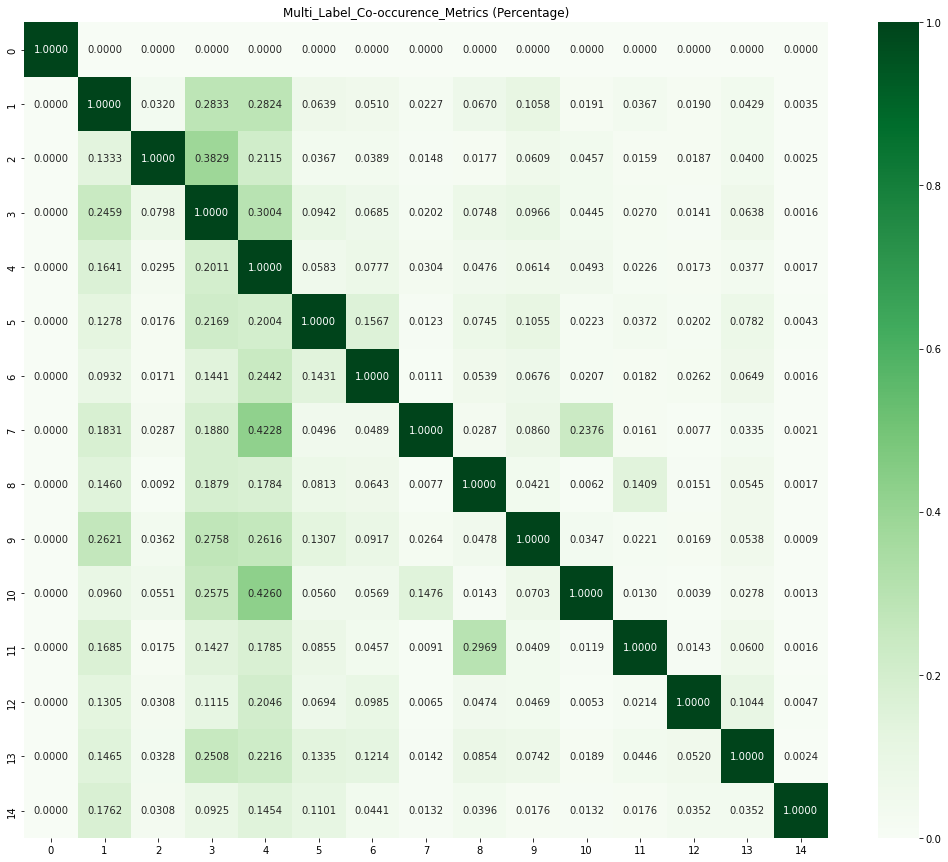

In [6]:
plt.figure(figsize=(18, 15))
confusion_metrics_percentage =  sns.heatmap(percentage,
            cmap="Greens",
            annot=True,
            label=True,
            fmt=".4f")
fig = confusion_metrics_percentage.get_figure()
fig.savefig("Multi_Label_Co-occurence_Metrics_in_Percentage.png") 
plt.title("Multi_Label_Co-occurence_Metrics (Percentage)")
plt.show();

In [7]:
count_class = {}
for each_class in df.columns[1:] :
    #print(each_class)
    df_new = df[each_class].value_counts() 
    count_class[df_new.name] = [df_new[1]]
pd.DataFrame(count_class)

,No Finding,Atelectasis,Cardiomegaly,Effusion,Infiltration,Mass,Nodule,Pneumonia,Pneumothorax,Consolidation,Edema,Emphysema,Fibrosis,Pleural_Thickening,Hernia
0,60361,11559,2776,13317,19894,5782,6331,1431,5302,4667,2303,2516,1686,3385,227


In [8]:
# Make classes for value counts
df_columns = df.columns
df_tmp = df.copy()
df_tmp['classes'] = None
df_tmp['class_list'] = None 

for idx in range(len(df_tmp)):
    df_tmp.iloc[idx, df_tmp.columns.get_loc('classes')] = ", ".join(df_columns[df.iloc[idx] == 1])
    df_tmp['class_list'].iloc[idx] = df_columns[df.iloc[idx] == 1]
    # df_tmp['classes'].iloc[idx] = ", ".join(df_columns[df.iloc[idx] == 1])
    # print(idx)

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [9]:
df_tmp

,Image_Path,No Finding,Atelectasis,Cardiomegaly,Effusion,Infiltration,Mass,Nodule,Pneumonia,Pneumothorax,Consolidation,Edema,Emphysema,Fibrosis,Pleural_Thickening,Hernia,classes,class_list
0,dataset/ChestXray NIH/images_001/images/000000...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,Cardiomegaly,"Index(['Cardiomegaly'], dtype='object')"
1,dataset/ChestXray NIH/images_001/images/000000...,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,"Cardiomegaly, Emphysema","Index(['Cardiomegaly', 'Emphysema'], dtype='ob..."
2,dataset/ChestXray NIH/images_001/images/000000...,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,"Cardiomegaly, Effusion","Index(['Cardiomegaly', 'Effusion'], dtype='obj..."
3,dataset/ChestXray NIH/images_001/images/000000...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,No Finding,"Index(['No Finding'], dtype='object')"
4,dataset/ChestXray NIH/images_001/images/000000...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Hernia,"Index(['Hernia'], dtype='object')"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112115,dataset/ChestXray NIH/images_012/images/000308...,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,"Mass, Pneumonia","Index(['Mass', 'Pneumonia'], dtype='object')"
112116,dataset/ChestXray NIH/images_012/images/000308...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,No Finding,"Index(['No Finding'], dtype='object')"
112117,dataset/ChestXray NIH/images_012/images/000308...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,No Finding,"Index(['No Finding'], dtype='object')"
112118,dataset/ChestXray NIH/images_012/images/000308...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,No Finding,"Index(['No Finding'], dtype='object')"


In [10]:
df_tmp["classes"].value_counts()

No Finding                                                                    60361
Infiltration                                                                   9547
Atelectasis                                                                    4215
Effusion                                                                       3955
Nodule                                                                         2705
                                                                              ...  
Atelectasis, Effusion, Infiltration, Mass, Pneumothorax, Consolidation            1
Atelectasis, Infiltration, Pneumothorax, Consolidation, Pleural_Thickening        1
Atelectasis, Nodule, Pneumonia, Consolidation                                     1
Effusion, Edema, Pleural_Thickening                                               1
Atelectasis, Mass, Pneumothorax, Consolidation, Pleural_Thickening                1
Name: classes, Length: 801, dtype: int64

In [11]:
pd.DataFrame(df_tmp["classes"].value_counts()).to_csv("Label_counts.csv")

In [12]:
df_tmp['class_list']

0                   Index(['Cardiomegaly'], dtype='object')
1         Index(['Cardiomegaly', 'Emphysema'], dtype='ob...
2         Index(['Cardiomegaly', 'Effusion'], dtype='obj...
3                     Index(['No Finding'], dtype='object')
4                         Index(['Hernia'], dtype='object')
                                ...                        
112115         Index(['Mass', 'Pneumonia'], dtype='object')
112116                Index(['No Finding'], dtype='object')
112117                Index(['No Finding'], dtype='object')
112118                Index(['No Finding'], dtype='object')
112119                Index(['No Finding'], dtype='object')
Name: class_list, Length: 112120, dtype: object

In [13]:
a = set(['B', 'C'])
b = set(['B', 'A', 'C'])
a == b

False

In [14]:
for name, count in df_tmp['classes'].value_counts().items():
    set_class = name.split(", ")
    
    for checker, _ in df_tmp['classes'].value_counts().items():
        checker_split = checker.split(", ")
        
        if set(checker_split) == set(set_class):       
            if checker_split != set_class:
                print(checker_split, set_class)
        
        
    # break    
    # print(name.split(", "), count)
    # print(set(x.index.split(", ")))

In [15]:
df_tmp['classes'].value_counts().items()
